In [17]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import math



In [2]:
num_population = 333333
voters = []
num_reps = 3 #3 by default
class Voter():
    
    def __init__(self, posx, posy, preferences):
        
        self.posx = posx
        self.posy = posy
        self.preferences = preferences #list of preferences for each party
    
        


def readMapFile(mapfile):
    read_file = open(mapfile, "r")
    data = read_file.readline()
    details = data.split(" ")
    num_population = int(details[0])
    num_parties = int(details[1])
    a = 0
    for i in range(1, num_population+1):
        voter_info = read_file.readline().split(" ")
        preferences = [float(voter_info[i]) for i in range(2,2+num_parties)]
        voter = Voter(float(voter_info[0]),float(voter_info[1]),preferences)
        voters.append(voter)
        
    
    
    read_file.close()
    
    


In [3]:
readMapFile("./g3Oct7ThreeParty.map")

In [4]:
xvals = [voters[i].posx for i in range(len(voters))]
yvals = [voters[i].posy for i in range(len(voters))]



In [5]:
from sklearn.cluster import MiniBatchKMeans as MBKMeans
kmeans = MBKMeans(n_clusters=81) 
kmeans_data = np.vstack((xvals, yvals)).T
kmeans.fit(kmeans_data)
centers = kmeans.cluster_centers_



In [45]:
plt.figure(figsize=(200,80))

xy = [[0,0], [1000,0], [500,500*math.sqrt(3)]]
x = [xy[i][0] for i in range(0,3)]
y = [xy[i][1] for i in range(0,3)]
plt.triplot(x, y, lw=5.0,c='black')

plt.scatter(xvals,yvals)


In [46]:
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=2000)


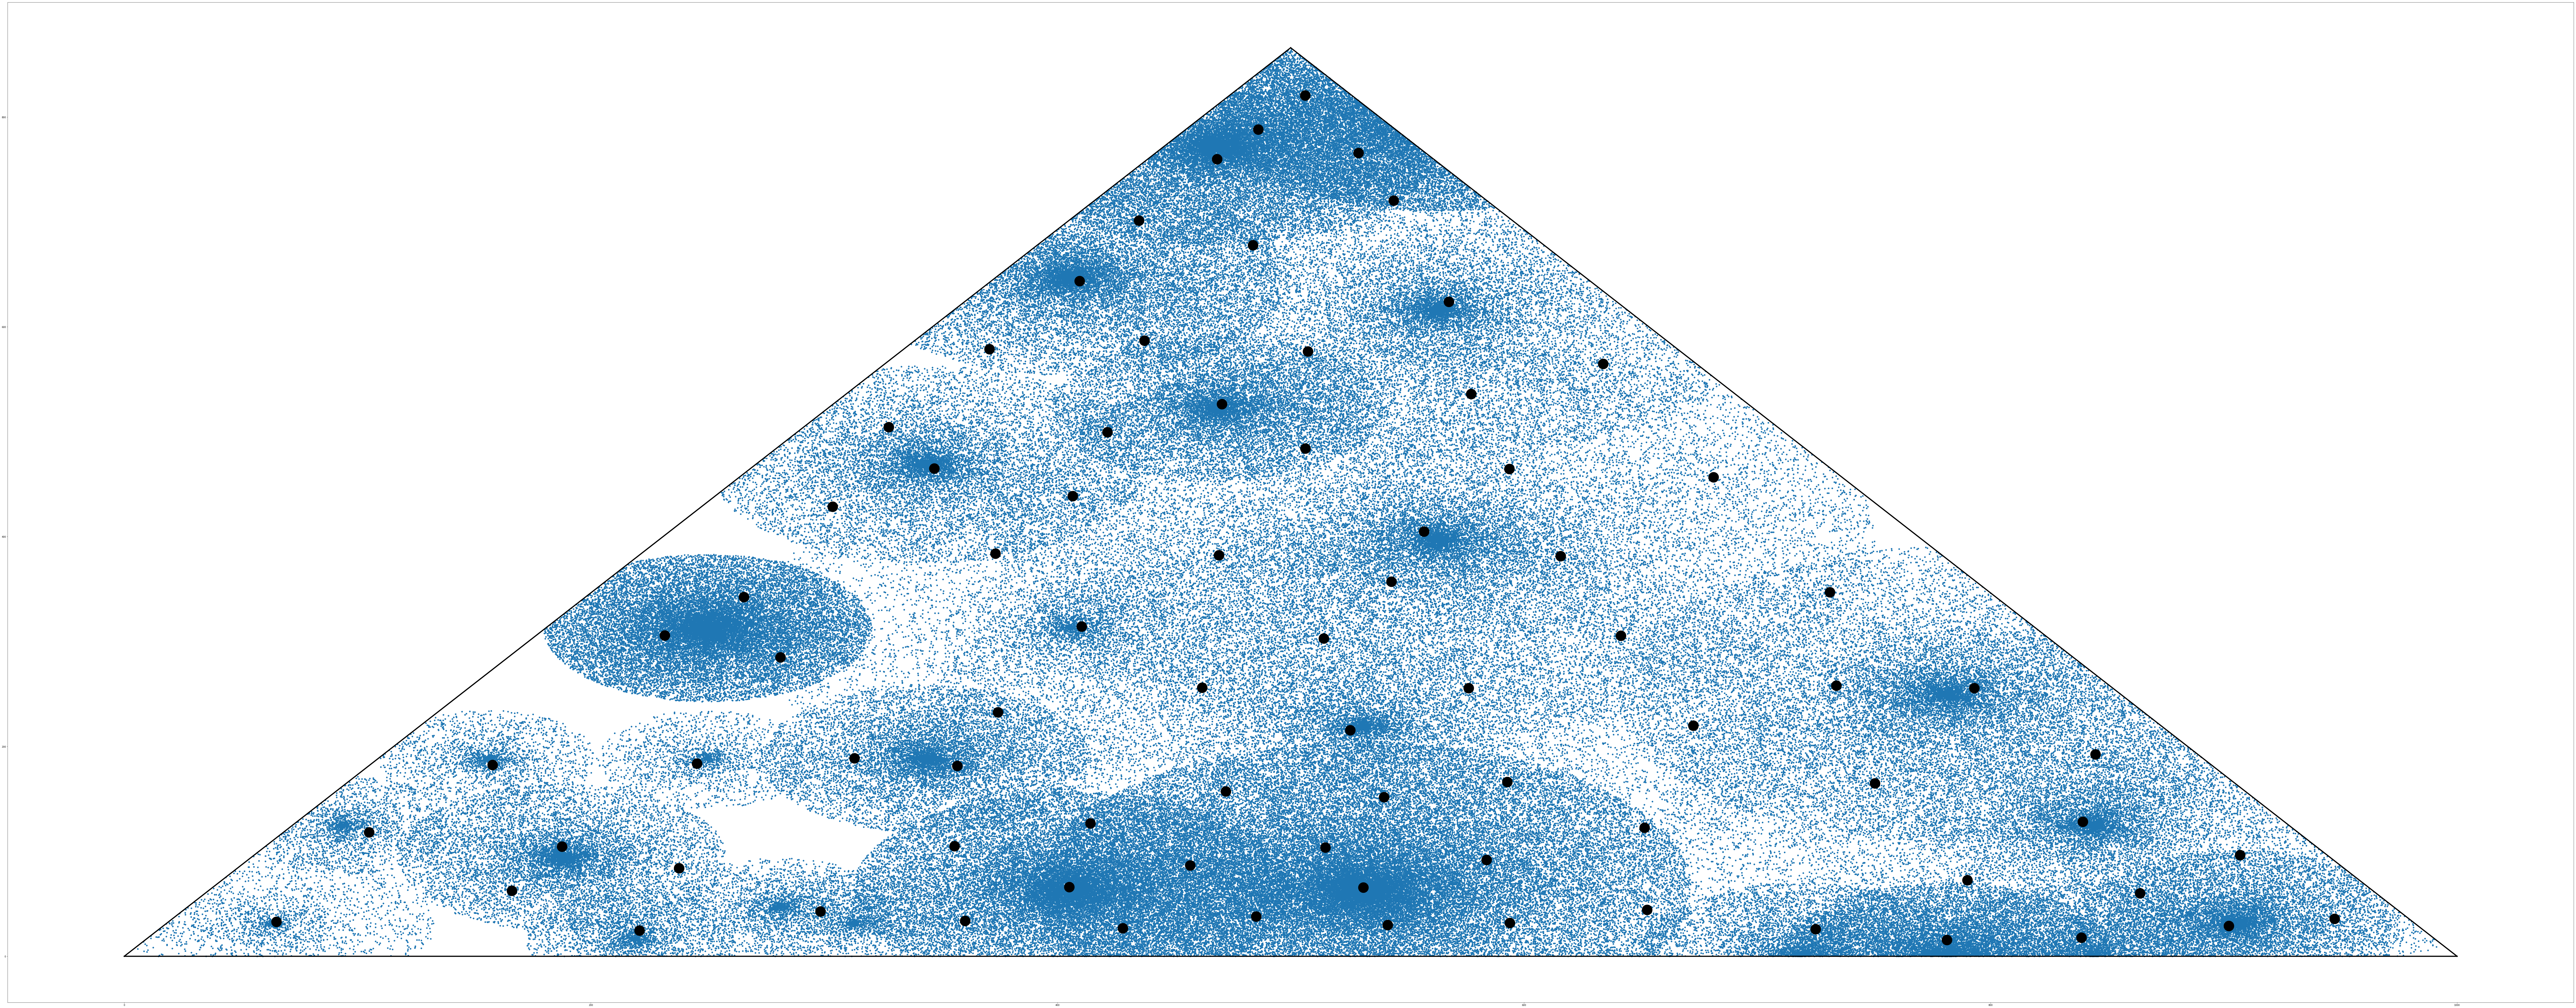

In [47]:
plt.show()

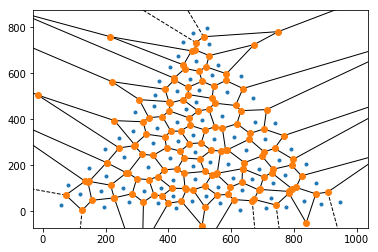

In [29]:
from scipy.spatial import Voronoi, voronoi_plot_2d
vor = Voronoi(centers)
voronoi_plot_2d(vor)
plt.show()

In [28]:
def voronoi_finite_polygons_2d(vor, radius=None):
    """Reconstruct infinite Voronoi regions in a
    2D diagram to finite regions.
    Source:
    [https://stackoverflow.com/a/20678647/1595060](https://stackoverflow.com/a/20678647/1595060)
    """
    if vor.points.shape[1] != 2:
        raise ValueError("Requires 2D input")
    new_regions = []
    new_vertices = vor.vertices.tolist()
    center = vor.points.mean(axis=0)
    if radius is None:
        radius = vor.points.ptp().max()
    # Construct a map containing all ridges for a
    # given point
    all_ridges = {}
    for (p1, p2), (v1, v2) in zip(vor.ridge_points,
                                  vor.ridge_vertices):
        all_ridges.setdefault(
            p1, []).append((p2, v1, v2))
        all_ridges.setdefault(
            p2, []).append((p1, v1, v2))
    # Reconstruct infinite regions
    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]
        if all(v >= 0 for v in vertices):
            # finite region
            new_regions.append(vertices)
            continue
        # reconstruct a non-finite region
        ridges = all_ridges[p1]
        new_region = [v for v in vertices if v >= 0]
        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                # finite ridge: already in the region
                continue
            # Compute the missing endpoint of an
            # infinite ridge
            t = vor.points[p2] - \
                vor.points[p1]  # tangent
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])  # normal
            midpoint = vor.points[[p1, p2]]. \
                mean(axis=0)
            direction = np.sign(
                np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[v2] + \
                direction * radius
            new_region.append(len(new_vertices))
            new_vertices.append(far_point.tolist())
        # Sort region counterclockwise.
        vs = np.asarray([new_vertices[v]
                         for v in new_region])
        c = vs.mean(axis=0)
        angles = np.arctan2(
            vs[:, 1] - c[1], vs[:, 0] - c[0])
        new_region = np.array(new_region)[
            np.argsort(angles)]
        new_regions.append(new_region.tolist())
    return new_regions, np.asarray(new_vertices)




In [29]:
voronoi_finite_polygons_2d(vor)

([[125, 106, 66, 65, 81, 124],
  [88, 50, 11, 12, 87],
  [71, 69, 68, 67, 70],
  [120, 56, 59, 58, 118],
  [111, 107, 109, 108, 110],
  [122, 78, 77, 119],
  [103, 28, 29, 9, 55, 101],
  [75, 16, 60, 62, 14, 4, 74],
  [54, 34, 33, 3, 13, 53],
  [93, 51, 45, 47, 44, 92],
  [2, 151, 152, 8, 19, 20, 15, 1],
  [63, 5, 1, 15, 61],
  [36, 32, 34, 33, 35],
  [144, 115, 114, 80, 123, 126, 143],
  [71, 25, 18, 6, 7, 70],
  [153, 90, 87, 88, 89, 91, 154],
  [150, 83, 85, 84, 104, 146],
  [149, 133, 132, 82, 128, 148],
  [36, 31, 29, 9, 32],
  [22, 4, 14, 21],
  [95, 93, 92, 94],
  [139, 136, 135, 137, 138],
  [100, 97, 96, 98, 99],
  [155, 38, 109, 108, 40, 39, 10, 156],
  [71, 25, 24, 23, 69],
  [116, 41, 79, 80, 114],
  [157, 2, 41, 116, 117, 76, 37, 158],
  [86, 49, 0, 159, 160, 91],
  [148, 128, 141, 142, 129, 147],
  [66, 64, 63, 5, 65],
  [55, 9, 32, 34, 54],
  [74, 4, 22, 26, 30, 73],
  [124, 81, 79, 80, 123],
  [150, 146, 147, 148, 149],
  [89, 86, 49, 50, 88],
  [100, 52, 51, 93, 95, 97